In [34]:
from math import log10 as log
from math import sqrt as akar
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Kabel FO ............
L = np.arange(1, 120, 1) #jarak STO (dalam KM)
Hspel = 2 #jarak per check-point (dalam KM)
dispersi_material = 17e-12 #tergantung spek kabel (dalam s/km.nm) (disp_M)
redaman_fiber = 0.2 #berapa redaman (dalam dB/km) (alpha_f)

In [36]:
# Pengirim
daya_kirim_mw = 8 #berapa daya kirim dalam mw (ptx)
daya_kirim_db = 10*log(daya_kirim_mw) #berapa daya kirim dalam db (ptx_db)
lebar_spektral = 0.1 #lebar spektral (dalam nm)
rise_time_tx = 35e-12 #rise time (dalam detik) (t_tx)
modulasi_NRZ = 0.7 #NRZ
modulasi_RZ = 0.35 #RZ
bit_rate = 2.5e9 # contoh 1e9 = 1gbps (tergantung spesifikasi kabel)
Tb = 1/bit_rate #waktu bit (dalam satu bit butuh berapa waktu (dalam detik))

In [37]:
# Lanjut pengirim
sensitivitas = -27 #(dalam dBm) 
rise_time_rx = 35e-12 #(dalam detik satuam pico (e-12)) (t_rx)


In [38]:
# Redaman Kanal
jumlah_connector = 2 #karena point to point
redaman_per_point = 0.1 #berapa redaman dalam tiap checkpoint (db/titik) (alpha_c)
jumlah_splice = (L/Hspel)-1 #(N_sp)
redaman_per_point = 0.1 #db/titik (alpha_sp)
margin_sistem = 3 #redaman tak terduga (berdasarkan lingkungan) (ms)


# Link Power Budget (membandingkan daya)
Hitung lost total
$$\alpha_T= 2\alpha_c+N_{sp}\alpha_{sp}+L
\alpha_f +M_s$$


In [39]:
alpa_t = jumlah_connector*redaman_per_point+jumlah_splice*redaman_per_point+L*redaman_fiber+margin_sistem

In [40]:
#daya terim (prx)
prx = daya_kirim_db-alpa_t

# Rise Time Budget (membandingkan dispersi)
$$t_{sys}=\sqrt{t_{tx}^2+t_{mat}^2+t_{mod}^2+t_{wg}^2+t_{rx}^2} $$

In [41]:
t_material = dispersi_material*L*lebar_spektral
t_wg = 0 #diabaikan
t_mod = 0 # 0 karena menggunakan SM (single mode)
t_sys = np.sqrt((rise_time_tx**2)+(t_material**2)+(t_mod**2)+(t_wg**2)+rise_time_rx**2)
print(t_sys)


[4.95266595e-11 4.96141109e-11 4.97595217e-11 4.99623859e-11
 5.02220071e-11 5.05375108e-11 5.09078579e-11 5.13318615e-11
 5.18082040e-11 5.23354564e-11 5.29120969e-11 5.35365296e-11
 5.42071029e-11 5.49221267e-11 5.56798886e-11 5.64786685e-11
 5.73167515e-11 5.81924394e-11 5.91040608e-11 6.00499792e-11
 6.10285999e-11 6.20383752e-11 6.30778091e-11 6.41454597e-11
 6.52399418e-11 6.63599277e-11 6.75041480e-11 6.86713914e-11
 6.98605039e-11 7.10703876e-11 7.23000000e-11 7.35483514e-11
 7.48145039e-11 7.60975689e-11 7.73967054e-11 7.87111174e-11
 8.00400525e-11 8.13827992e-11 8.27386850e-11 8.41070746e-11
 8.54873675e-11 8.68789963e-11 8.82814250e-11 8.96941470e-11
 9.11166834e-11 9.25485818e-11 9.39894143e-11 9.54387762e-11
 9.68962848e-11 9.83615779e-11 9.98343127e-11 1.01314165e-10
 1.02800827e-10 1.04294007e-10 1.05793431e-10 1.07298835e-10
 1.08809972e-10 1.10326606e-10 1.11848514e-10 1.13375482e-10
 1.14907310e-10 1.16443806e-10 1.17984787e-10 1.19530080e-10
 1.21079519e-10 1.226329

Text(0.5, 1.0, 'Kurva link power budget')

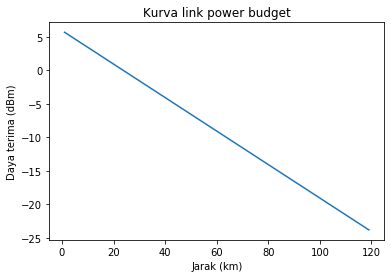

In [42]:
#Kurva link power budget
plt.plot(L,prx)
plt.xlabel("Jarak (km)")
plt.ylabel("Daya terima (dBm)")
plt.title("Kurva link power budget")


Text(0.5, 1.0, 'kurva RTB')

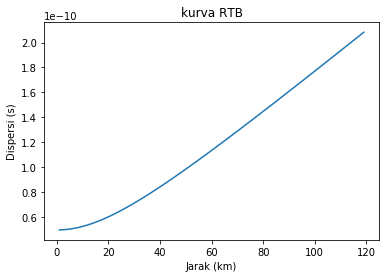

In [43]:
plt.plot(L, t_sys)
plt.xlabel("Jarak (km)")
plt.ylabel("Dispersi (s)")
plt.title("kurva RTB")